In [7]:
import os, pickle
from tqdm import tqdm  # Import tqdm for progress tracking
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import matplotlib.cm as cm


## Load Important Function

In [8]:
class Data:
    def __init__(self, array_list):
        self.array_list = array_list

    def save(self, filename):
        with open(filename, 'wb') as f:
            pickle.dump(self.array_list, f)

    @classmethod
    def load(cls, filename):
        with open(filename, 'rb') as f:
            array_list = pickle.load(f)
        return cls(array_list)
    

## Plain MD

In [9]:
def plain_md_index_to_state(index):
    """Converts an index (0-7) into a (3,) binary state array."""
    if not (0 <= index < 8):  # Ensure valid range (0-7)
        raise ValueError(f"Index out of range: {index}. Expected 0-7.")

    # Convert index to a 3-bit binary string
    binary_str = format(index, '03b')  # Example: 3 -> '011'
    
    # Convert binary string to NumPy array of integers
    state = np.array([int(bit) for bit in binary_str], dtype=int)

    return state

In [10]:
plain_md_path = '../Plain_MD/analysis'

omega_loaded = Data.load(f"{plain_md_path}/autocoorel_data/stationary_distributions_1us_5000stride.pkl").array_list
plain_md_pi_all_means = omega_loaded[0]
plain_md_pi_all_stds = omega_loaded[3]
plain_md_lagtimes_ns = omega_loaded[8]

plain_md_pi_all_means


array([[0.07183219, 0.08151823, 0.06320745, 0.06563194, 0.16626032,
        0.22592309, 0.1555817 , 0.17004509],
       [0.07143055, 0.08995254, 0.06247449, 0.06192587, 0.16835045,
        0.24466264, 0.14109281, 0.16011066],
       [0.07809416, 0.0817186 , 0.05978163, 0.0582323 , 0.16978474,
        0.24496861, 0.15109279, 0.15632717],
       [0.07318229, 0.08411464, 0.0693959 , 0.05810955, 0.16728274,
        0.23657413, 0.15752033, 0.15382043],
       [0.06873227, 0.09186265, 0.05856608, 0.05722292, 0.15908403,
        0.25443676, 0.1472263 , 0.162869  ],
       [0.07023394, 0.09180471, 0.06070204, 0.05609629, 0.16699138,
        0.25290785, 0.14884265, 0.15242114],
       [0.06739687, 0.08343865, 0.07720228, 0.05611938, 0.16057289,
        0.23377371, 0.15626119, 0.16523501],
       [0.06773437, 0.09811284, 0.05582742, 0.06897365, 0.15715835,
        0.25627536, 0.14230655, 0.15361147],
       [0.07237772, 0.0865244 , 0.07890703, 0.05582259, 0.16133825,
        0.23392879, 0.149165

201.0:0.067 +- 0.062
201.0:0.083 +- 0.060
201.0:0.077 +- 0.122
201.0:0.056 +- 0.044
201.0:0.161 +- 0.131
201.0:0.234 +- 0.165
201.0:0.156 +- 0.114
201.0:0.165 +- 0.131


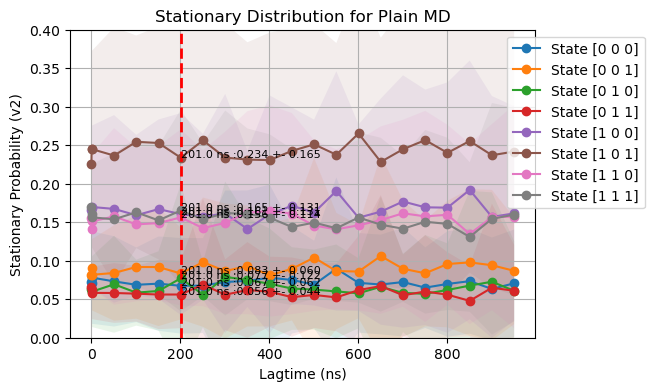

In [11]:
plt.figure(figsize=(6, 4))
state_to_plot = range(8)  # Fix: Select states 0 to 7

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(plain_md_lagtimes_ns, plain_md_pi_all_means[:, i], '-o', label=f'State {plain_md_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(plain_md_lagtimes_ns, 
                     plain_md_pi_all_means[:, i] + plain_md_pi_all_stds[:, i],  # Upper bound
                     plain_md_pi_all_means[:, i] - plain_md_pi_all_stds[:, i],  # Lower bound
                     alpha=0.1)

    # Annotate the first point with its value
    first_x = plain_md_lagtimes_ns[6]
    first_y = plain_md_pi_all_means[6, i]
    first_y_var = plain_md_pi_all_stds[6, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=8)
    print(f"{first_x}:{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Plain MD')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 0.4)
plt.grid(True)
plt.show()


## HREX

In [12]:
import numpy as np

def hrex_index_to_state(index):
    """
    Converts an index (0..47) into a (4,) array where the first three
    entries are bits (0 or 1) and the last entry is in [0..5].
    
    The logic is inverse of:
        index = 24*a + 12*b + 6*c + x,
    where a, b, c ∈ {0,1} and x ∈ [0..5].
    """
    if not (0 <= index < 48):
        raise ValueError(f"Index out of range: {index}. Expected 0..47.")
    
    # Extract the last element in [0..5]
    x = index % 6

    # The 3-bit portion is the integer in [0..7]
    binary_index = index // 6  # in [0..7]

    # Convert that integer into a 3-bit binary string, e.g. '011'
    binary_str = format(binary_index, '03b')

    # Parse into bits [a, b, c]
    bits = np.array([int(bit) for bit in binary_str], dtype=int)

    # Combine bits and x => [a, b, c, x]
    state = np.concatenate([bits, [x]])

    return state


In [13]:
hrex_path = '../HREX/analysis'

omega_loaded = Data.load(f"{hrex_path}/autocoorel_data/stationary_distributions.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_stds = omega_loaded[3]
hrex_lagtimes_ns = omega_loaded[8]
pi_all_means


array([[0.01080345, 0.01038247, 0.00961046, ..., 0.03284667, 0.03409406,
        0.03474208],
       [0.01080354, 0.01038255, 0.00961053, ..., 0.03284606, 0.03409383,
        0.03474186],
       [0.01080369, 0.01038268, 0.00961064, ..., 0.03284583, 0.03409433,
        0.03474257],
       ...,
       [0.0099405 , 0.01123158, 0.01112541, ..., 0.03238375, 0.03320805,
        0.03299727],
       [0.00895083, 0.00981399, 0.01040009, ..., 0.03491675, 0.03235479,
        0.03176248],
       [0.01104193, 0.01174344, 0.01292417, ..., 0.02842291, 0.02744273,
        0.02717538]])

In [14]:
state0_index = [0, 6, 12, 18, 24, 30, 36, 42]

# Extract columns from the second dimension
pi_all_means_0 = pi_all_means[:, state0_index]
pi_all_stds_0 = pi_all_stds[:, state0_index]

# Compute row sums
row_sums = pi_all_means[:, state0_index].sum(axis=1, keepdims=True)
# Renormalize the mean
pi_all_means_0 /= row_sums
# Renormalize the standard deviation
pi_all_stds_0 /= row_sums

hrex_pi_all_means_0 = pi_all_means_0
hrex_pi_all_stds_0 = pi_all_stds_0


# Print shapes to confirm correctness
print(f"pi_all_means_0 shape: {hrex_pi_all_means_0.shape}")  # Expected: (4, 8)
print(f"pi_all_stds_0 shape: {hrex_pi_all_stds_0.shape}")  # Expected: (4, 8)

hrex_pi_all_means_0[0]


pi_all_means_0 shape: (604, 8)
pi_all_stds_0 shape: (604, 8)


array([0.06482059, 0.09186797, 0.06130279, 0.07076823, 0.15936155,
       0.23091623, 0.13949349, 0.18146915])

101.0 ns :0.065 +- 0.001
101.0 ns :0.092 +- 0.001
101.0 ns :0.062 +- 0.001
101.0 ns :0.071 +- 0.000
101.0 ns :0.159 +- 0.000
101.0 ns :0.231 +- 0.000
101.0 ns :0.139 +- 0.000
101.0 ns :0.181 +- 0.000


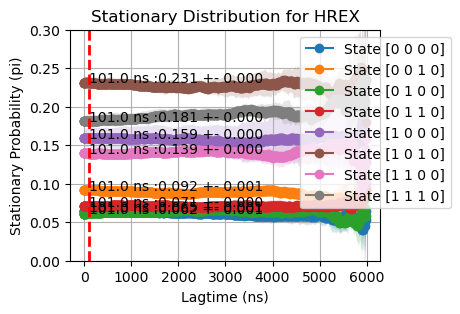

In [15]:
plt.figure(figsize=(4, 3))
state_to_plot = [0, 6, 12, 18, 24, 30, 36, 42]

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(hrex_lagtimes_ns, hrex_pi_all_means_0[:, i], '-o', label=f'State {hrex_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(hrex_lagtimes_ns, 
                     hrex_pi_all_means_0[:, i] + hrex_pi_all_stds_0[:, i],  # Upper bound
                     hrex_pi_all_means_0[:, i] - hrex_pi_all_stds_0[:, i],  # Lower bound
                     alpha=0.2)
    
    # Annotate the first point with its value
    first_x = hrex_lagtimes_ns[14]
    first_y = pi_all_means_0[14, i]
    first_y_var = pi_all_stds[14, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=10)
    print(f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)
plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (pi)')
plt.title('Stationary Distribution for HREX')
plt.ylim(0, 0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.show()


## EE

In [16]:
def ee_index_to_state(index):
    """
    Converts an index (0-31) into a (4,) array where the first three
    entries are binary bits (0 or 1) and the last entry is in [0..3].

    The logic is:
      - The last entry is index % 4.
      - The first 3 bits come from index // 4, in [0..7].
    """
    if not (0 <= index < 32):
        raise ValueError(f"Index out of range: {index}. Expected 0-31.")

    # Last element: in [0..3]
    last_part = index % 4

    # The 3-bit portion is the integer in [0..7]
    binary_index = index // 4  # in [0..7]

    # Convert that binary_index into a 3-bit binary string, e.g. '011'
    binary_str = format(binary_index, '03b')

    # Create an array of the three bits
    bits = np.array([int(bit) for bit in binary_str], dtype=int)

    # Combine [first 3 bits, last_part]
    state = np.concatenate([bits, [last_part]])
    
    return state

In [17]:
ee_path = '../EE/analysis'

omega_loaded = Data.load(f"{ee_path}/autocoorel_data/stationary_distributions.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_stds = omega_loaded[3]
ee_lagtimes_ns = omega_loaded[8]
pi_all_means


array([[0.01496437, 0.01463983, 0.01479761, ..., 0.04608255, 0.0470104 ,
        0.05032458],
       [0.01494107, 0.01459601, 0.01478793, ..., 0.04570925, 0.0467329 ,
        0.05004378],
       [0.01504323, 0.01471755, 0.01485999, ..., 0.04598389, 0.04683238,
        0.05020124],
       ...,
       [0.03304838, 0.03203204, 0.03159612, ..., 0.03258202, 0.03019445,
        0.0298789 ],
       [0.03323153, 0.03181722, 0.03102532, ..., 0.0323242 , 0.03331344,
        0.03076401],
       [0.03101649, 0.03097138, 0.03045342, ..., 0.03153865, 0.03055109,
        0.03279286]])

In [18]:
state_index = [0, 4, 8, 12, 16, 20, 24, 28]
state_index = np.array(state_index)

state_num = 4
cis_trans_pi_means = []  # To store each (3, 604, 2)
cis_trans_pi_stds = []

for state in range(state_num):
    index = state_index + state

    # Extract columns from the second dimension
    pi_means = pi_all_means[:, index]
    pi_stds = pi_all_stds[:, index]
    print(pi_means.shape)

    # Compute row sums
    row_sums = pi_means.sum(axis=1, keepdims=True)
    # Renormalize the mean
    pi_means /= row_sums
    # Renormalize the standard deviation
    pi_stds /= row_sums

    # Print shapes to confirm correctness
    print(f"pi_means shape: {pi_means.shape}")  # Expected: (4, 8)
    print(f"pi_stds shape: {pi_stds.shape}")  # Expected: (4, 8)

    # Store each normalized pair
    cis_trans_pi_means.append(pi_means)
    cis_trans_pi_stds.append(pi_stds)

# Stack results into shape: (6, 3, 604, 2)
ee_cis_trans_pi_means = np.stack(np.array(cis_trans_pi_means), axis=0)
ee_cis_trans_pi_stds = np.stack(np.array(cis_trans_pi_stds), axis=0)

print("cis_trans_pi_means shape:", ee_cis_trans_pi_means.shape)
print("ee_cis_trans_pi_stds shape:", ee_cis_trans_pi_stds.shape)

#cis_trans_pi_means

(184, 8)
pi_means shape: (184, 8)
pi_stds shape: (184, 8)
(184, 8)
pi_means shape: (184, 8)
pi_stds shape: (184, 8)
(184, 8)
pi_means shape: (184, 8)
pi_stds shape: (184, 8)
(184, 8)
pi_means shape: (184, 8)
pi_stds shape: (184, 8)
cis_trans_pi_means shape: (4, 184, 8)
ee_cis_trans_pi_stds shape: (4, 184, 8)


Thermo 0, Conf 0: 101.00 ns : 0.061
Thermo 0, Conf 1: 101.00 ns : 0.096
Thermo 0, Conf 2: 101.00 ns : 0.060
Thermo 0, Conf 3: 101.00 ns : 0.079
Thermo 0, Conf 4: 101.00 ns : 0.142
Thermo 0, Conf 5: 101.00 ns : 0.236
Thermo 0, Conf 6: 101.00 ns : 0.137
Thermo 0, Conf 7: 101.00 ns : 0.189


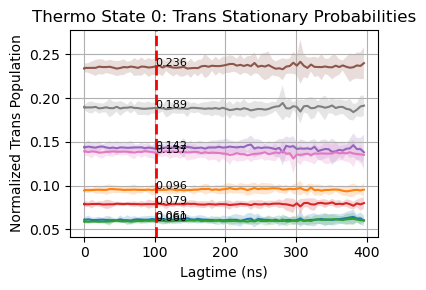

In [19]:
point_to_plot = 84
lagtime_plot = 24  # Index of lagtime to annotate

thermo_state_num = 1
comform_state_num = 8

for thermo in range(thermo_state_num):
    plt.figure(figsize=(4, 3))

    for conform in range(comform_state_num):
        res = ee_cis_trans_pi_means[thermo, :point_to_plot, conform]  # shape (point_to_plot,)
        std = ee_cis_trans_pi_stds[thermo, :point_to_plot, conform]  # shape (point_to_plot,)

        plt.plot(
            ee_lagtimes_ns[:point_to_plot],
            res,
            label=f"Conf {conform} - {res[lagtime_plot]:.3f} ± {std[lagtime_plot]:.3f}"
        )

        plt.fill_between(
            ee_lagtimes_ns[:point_to_plot],
            res + std,
            res - std,
            alpha=0.2
        )

        # Annotate point at selected lagtime
        x_val = ee_lagtimes_ns[lagtime_plot]
        y_val = res[lagtime_plot]
        plt.text(x_val, y_val, f"{y_val:.3f}", fontsize=8)

        print(f"Thermo {thermo}, Conf {conform}: {x_val:.2f} ns : {y_val:.3f}")

    plt.axvline(x=ee_lagtimes_ns[lagtime_plot], color='r', linestyle='--', linewidth=2)
    plt.title(f"Thermo State {thermo}: Trans Stationary Probabilities")
    plt.xlabel("Lagtime (ns)")
    plt.ylabel("Normalized Trans Population")
    plt.grid(True)
    #plt.legend()
    plt.tight_layout()
    plt.show()


## REDs

In [20]:
def reds_index_to_state(index):
    """
    Converts an index (0..23) into a (4,) array where the first three
    entries are bits (0 or 1) and the last entry is in [0..2].
    
    Inverse of:
        index = 12*a + 6*b + 3*c + x,
    where a, b, c ∈ {0,1}, x ∈ [0..2]
    """
    if not (0 <= index < 24):
        raise ValueError(f"Index out of range: {index}. Expected 0..23.")

    x = index % 3
    remainder = index // 3  # Gives 0..7

    c = remainder % 2
    b = (remainder // 2) % 2
    a = (remainder // 4) % 2

    return np.array([a, b, c, x], dtype=int)


In [21]:
reds_path = '../REDs/analysis'

omega_loaded = Data.load(f"{reds_path}/autocoorel_data/stationary_distributions.pkl").array_list
pi_all_means = omega_loaded[0]
pi_all_stds = omega_loaded[3]
reds_lagtimes_ns = omega_loaded[8]

pi_all_means.shape

(679, 24)

In [22]:
state0_index = np.arange(0, 24, 3).tolist()

# Extract columns from the second dimension
pi_all_means_0 = pi_all_means[:, state0_index]
pi_all_stds_0 = pi_all_stds[:, state0_index]

# Compute row sums
row_sums = pi_all_means[:, state0_index].sum(axis=1, keepdims=True)
# Renormalize the mean
pi_all_means_0 /= row_sums
# Renormalize the standard deviation
pi_all_stds_0 /= row_sums

reds_pi_all_means_0 = pi_all_means_0
reds_pi_all_stds_0 = pi_all_stds_0

# Print shapes to confirm correctness
print(f"reds_pi_all_means_0 shape: {reds_pi_all_means_0.shape}")  # Expected: (4, 8)
print(f"reds_pi_all_stds_0 shape: {reds_pi_all_stds_0.shape}")  # Expected: (4, 8)

reds_pi_all_means_0 shape: (679, 8)
reds_pi_all_stds_0 shape: (679, 8)


200.4 ns : 0.068 ± 0.004
200.4 ns : 0.079 ± 0.009
200.4 ns : 0.059 ± 0.004
200.4 ns : 0.072 ± 0.005
200.4 ns : 0.152 ± 0.022
200.4 ns : 0.240 ± 0.017
200.4 ns : 0.129 ± 0.014
200.4 ns : 0.201 ± 0.000


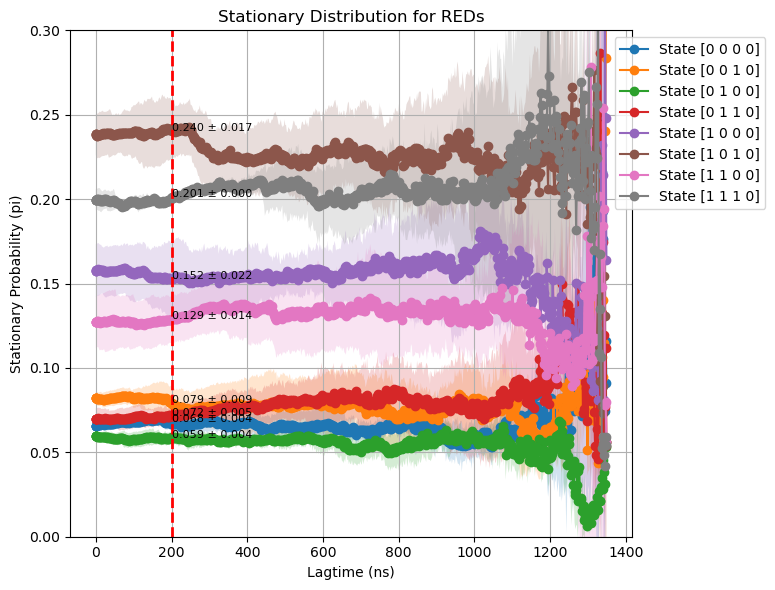

In [23]:
lagtime_plot = 104  # Index of lagtime to annotate
thermo_state = 0
plt.figure(figsize=(8, 6))
state_to_plot = (np.arange(0, 24, 3) + thermo_state).tolist()

for state in range(8):
    plt.plot(reds_lagtimes_ns, reds_pi_all_means_0[:, state], '-o', label=f'State {reds_index_to_state(state * 3)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(reds_lagtimes_ns, 
                        reds_pi_all_means_0[:, state] + reds_pi_all_stds_0[:, state],
                        reds_pi_all_means_0[:, state] - reds_pi_all_stds_0[:, state],
                        alpha=0.2)

    # Annotate the selected lagtime point
    first_x = reds_lagtimes_ns[lagtime_plot]
    first_y = reds_pi_all_means_0[lagtime_plot][state]
    first_y_var = reds_pi_all_stds_0[lagtime_plot][state]
    plt.text(first_x, first_y,  f"{first_y:.3f} ± {first_y_var:.3f}", fontsize=8)
    print(f"{first_x} ns : {first_y:.3f} ± {first_y_var:.3f}")

# Only one vertical line after loop
plt.axvline(x=reds_lagtimes_ns[lagtime_plot], color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (pi)')
plt.title('Stationary Distribution for REDs')
plt.ylim(0, 0.3)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True)
plt.tight_layout()
plt.show()


## Metadynamics

In [24]:
metadynamics_path = '../Metadynamics/analysis'


### omg

In [25]:
methods_path = f"{metadynamics_path}/autocooreldata/autocoorel_data_omg"

omega_loaded = Data.load(f"{methods_path}/stationary_distributions.pkl").array_list
meta_omg_pi_all_means = omega_loaded[0]
meta_omg_pi_all_stds = omega_loaded[3]
meta_omg_lagtimes_ns = omega_loaded[8]

meta_omg_pi_all_means.shape


(184, 8)

20.1:0.065 +- 0.065
20.1:0.098 +- 0.098
20.1:0.087 +- 0.087
20.1:0.089 +- 0.089
20.1:0.137 +- 0.137
20.1:0.195 +- 0.195
20.1:0.165 +- 0.165
20.1:0.164 +- 0.164


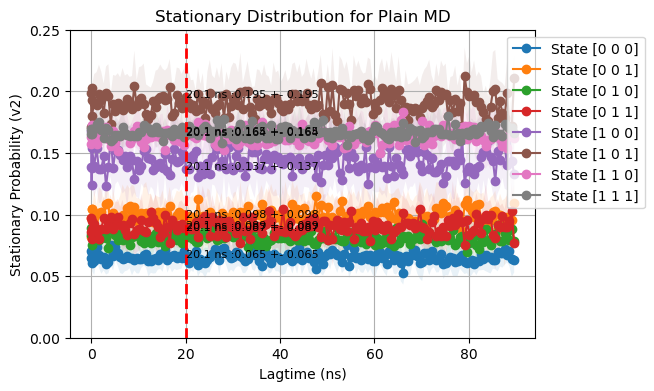

In [26]:
plt.figure(figsize=(6, 4))
state_to_plot = range(8)  # Fix: Select states 0 to 7

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(meta_omg_lagtimes_ns, meta_omg_pi_all_means[:, i], '-o', label=f'State {plain_md_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(meta_omg_lagtimes_ns, 
                     meta_omg_pi_all_means[:, i] + meta_omg_pi_all_stds[:, i],  # Upper bound
                     meta_omg_pi_all_means[:, i] - meta_omg_pi_all_stds[:, i],  # Lower bound
                     alpha=0.1)

    # Annotate the first point with its value
    first_x = meta_omg_lagtimes_ns[44]
    first_y = meta_omg_pi_all_means[44, i]
    first_y_var = meta_omg_pi_all_means[44, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=8)
    print(f"{first_x}:{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Plain MD')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 0.25)
plt.grid(True)
plt.show()


### oph

In [27]:
methods_path = f"{metadynamics_path}/autocooreldata/autocoorel_data_oph"

omega_loaded = Data.load(f"{methods_path}/stationary_distributions.pkl").array_list
meta_oph_pi_all_means = omega_loaded[0]
meta_oph_pi_all_stds = omega_loaded[3]
meta_oph_lagtimes_ns = omega_loaded[8]

meta_oph_lagtimes_ns.shape

(184,)

20.1:0.075 +- 0.075
20.1:0.082 +- 0.082
20.1:0.086 +- 0.086
20.1:0.085 +- 0.085
20.1:0.161 +- 0.161
20.1:0.192 +- 0.192
20.1:0.155 +- 0.155
20.1:0.163 +- 0.163


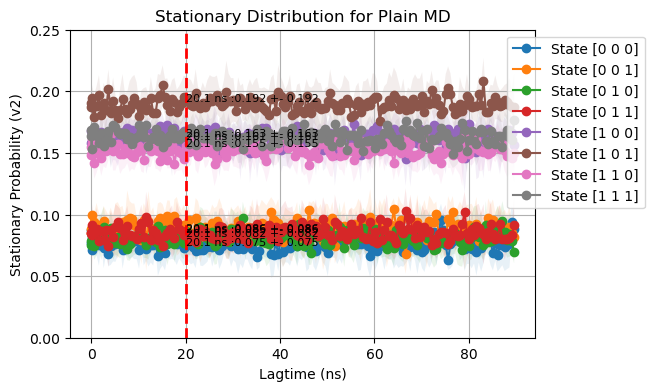

In [28]:
plt.figure(figsize=(6, 4))
state_to_plot = range(8)  # Fix: Select states 0 to 7

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(meta_oph_lagtimes_ns, meta_oph_pi_all_means[:, i], '-o', label=f'State {plain_md_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(meta_oph_lagtimes_ns, 
                     meta_oph_pi_all_means[:, i] + meta_oph_pi_all_stds[:, i],  # Upper bound
                     meta_oph_pi_all_means[:, i] - meta_oph_pi_all_stds[:, i],  # Lower bound
                     alpha=0.1)

    # Annotate the first point with its value
    first_x = meta_oph_lagtimes_ns[44]
    first_y = meta_oph_pi_all_means[44, i]
    first_y_var = meta_oph_pi_all_means[44, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=8)
    print(f"{first_x}:{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Plain MD')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 0.25)
plt.grid(True)
plt.show()


### opp

In [29]:
methods_path = f"{metadynamics_path}/autocooreldata/autocoorel_data_opp"

omega_loaded = Data.load(f"{methods_path}/stationary_distributions.pkl").array_list
meta_opp_pi_all_means = omega_loaded[0]
meta_opp_pi_all_stds = omega_loaded[3]
meta_opp_lagtimes_ns = omega_loaded[8]

meta_opp_pi_all_means.shape


(184, 8)

20.1:0.091 +- 0.091
20.1:0.094 +- 0.094
20.1:0.051 +- 0.051
20.1:0.069 +- 0.069
20.1:0.159 +- 0.159
20.1:0.218 +- 0.218
20.1:0.136 +- 0.136
20.1:0.182 +- 0.182


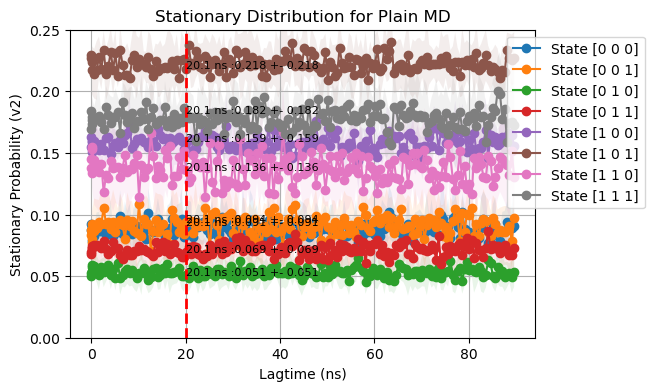

In [30]:
plt.figure(figsize=(6, 4))
state_to_plot = range(8)  # Fix: Select states 0 to 7

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(meta_opp_lagtimes_ns, meta_opp_pi_all_means[:, i], '-o', label=f'State {plain_md_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(meta_opp_lagtimes_ns, 
                     meta_opp_pi_all_means[:, i] + meta_opp_pi_all_stds[:, i],  # Upper bound
                     meta_opp_pi_all_means[:, i] - meta_opp_pi_all_stds[:, i],  # Lower bound
                     alpha=0.1)

    # Annotate the first point with its value
    first_x = meta_opp_lagtimes_ns[44]
    first_y = meta_opp_pi_all_means[44, i]
    first_y_var = meta_opp_pi_all_means[44, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=8)
    print(f"{first_x}:{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Plain MD')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 0.25)
plt.grid(True)
plt.show()


### oppc

In [31]:
methods_path = f"{metadynamics_path}/autocooreldata/autocoorel_data_oppc"

omega_loaded = Data.load(f"{methods_path}/stationary_distributions.pkl").array_list
meta_oppc_pi_all_means = omega_loaded[0]
meta_oppc_pi_all_stds = omega_loaded[3]
meta_oppc_lagtimes_ns = omega_loaded[8]

print(meta_oppc_pi_all_stds[0, :10])
print(meta_oppc_pi_all_means[0, :10])


[0.01739661 0.0296036  0.01033138 0.00727983 0.02603007 0.03027588
 0.01943877 0.02670439]
[0.05468408 0.06941447 0.09404818 0.09398163 0.15882878 0.19990819
 0.14890717 0.1802275 ]


20.1:0.059 +- 0.059
20.1:0.063 +- 0.063
20.1:0.089 +- 0.089
20.1:0.096 +- 0.096
20.1:0.171 +- 0.171
20.1:0.210 +- 0.210
20.1:0.143 +- 0.143
20.1:0.169 +- 0.169


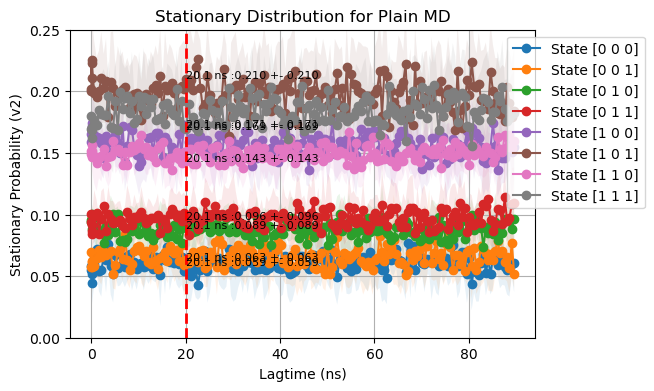

In [32]:
plt.figure(figsize=(6, 4))
state_to_plot = range(8)  # Fix: Select states 0 to 7

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(meta_oppc_lagtimes_ns, meta_oppc_pi_all_means[:, i], '-o', label=f'State {plain_md_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(meta_oppc_lagtimes_ns, 
                     meta_oppc_pi_all_means[:, i] + meta_oppc_pi_all_stds[:, i],  # Upper bound
                     meta_oppc_pi_all_means[:, i] - meta_oppc_pi_all_stds[:, i],  # Lower bound
                     alpha=0.1)

    # Annotate the first point with its value
    first_x = meta_oppc_lagtimes_ns[44]
    first_y = meta_oppc_pi_all_means[44, i]
    first_y_var = meta_oppc_pi_all_means[44, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=8)
    print(f"{first_x}:{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Plain MD')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 0.25)
plt.grid(True)
plt.show()


### omg8rep

In [33]:
from tqdm import tqdm

methods_path = f"{metadynamics_path}/autocooreldata/autocoorel_data_omg8rep"

meta_omg8rep_pi_means = []
meta_omg8rep_pi_stds =[]
for i in tqdm(range(8)):
    omega_loaded_single = Data.load(f"{methods_path}/stationary_distributions{i}.pkl").array_list

    meta_omg8rep_pi_means_single = omega_loaded_single[0]
    meta_omg8rep_pi_stds_single = omega_loaded_single[3]
    meta_omg8rep_pi_means.append(meta_omg8rep_pi_means_single)
    meta_omg8rep_pi_stds.append(meta_omg8rep_pi_stds_single)

meta_omg8rep_lagtimes_ns = omega_loaded_single[8]

#meta_omg8rep_pi_all_means = meta_omg8rep_pi_means
meta_omg8rep_pi_means = np.array(meta_omg8rep_pi_means)
meta_omg8rep_pi_stds = np.array(meta_omg8rep_pi_stds)


# Mean across all replicas
meta_omg8rep_pi_all_means = np.nanmean(meta_omg8rep_pi_means, axis=0)

# Law of total variance
within_var = np.nanmean(meta_omg8rep_pi_stds**2, axis=0)  # average within-replica variance
between_var = np.nanvar(meta_omg8rep_pi_means, axis=0, ddof=1)  # var
meta_omg8rep_pi_all_stds = np.sqrt(within_var + between_var)


meta_omg8rep_lagtimes_ns[-1]

100%|██████████| 8/8 [00:00<00:00, 1264.63it/s]


896.0

201.0:0.087 +- 0.087
201.0:0.092 +- 0.092
201.0:0.073 +- 0.073
201.0:0.068 +- 0.068
201.0:0.151 +- 0.151
201.0:0.237 +- 0.237
201.0:0.119 +- 0.119
201.0:0.174 +- 0.174


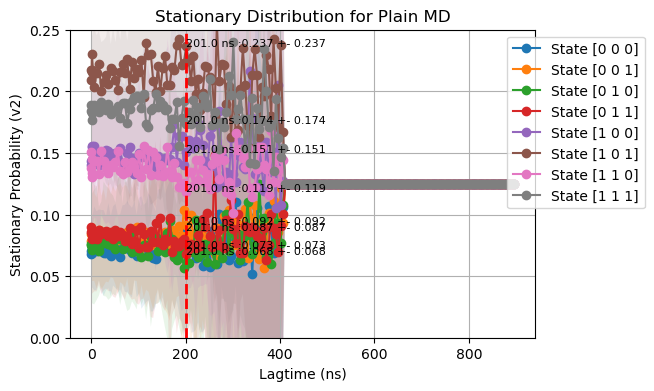

In [34]:
plt.figure(figsize=(6, 4))
state_to_plot = range(8)  # Fix: Select states 0 to 7

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(meta_omg8rep_lagtimes_ns, meta_omg8rep_pi_all_means[:, i], '-o', label=f'State {plain_md_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(meta_omg8rep_lagtimes_ns, 
                     meta_omg8rep_pi_all_means[:, i] + meta_omg8rep_pi_all_stds[:, i],  # Upper bound
                     meta_omg8rep_pi_all_means[:, i] - meta_omg8rep_pi_all_stds[:, i],  # Lower bound
                     alpha=0.1)

    # Annotate the first point with its value
    first_x = meta_omg8rep_lagtimes_ns[44]
    first_y = meta_omg8rep_pi_all_means[44, i]
    first_y_var = meta_omg8rep_pi_all_means[44, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=8)
    print(f"{first_x}:{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Plain MD')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 0.25)
plt.grid(True)
plt.show()


### oppc8rep

In [35]:
from tqdm import tqdm

methods_path = f"{metadynamics_path}/autocooreldata/autocoorel_data_oppc8rep"

meta_oppc8rep_pi_means = []
meta_oppc8rep_pi_stds =[]
for i in tqdm(range(8)):
    omega_loaded_single = Data.load(f"{methods_path}/stationary_distributions{i}.pkl").array_list

    meta_oppc8rep_pi_means_single = omega_loaded_single[0]
    meta_oppc8rep_pi_stds_single = omega_loaded_single[3]
    meta_oppc8rep_pi_means.append(meta_oppc8rep_pi_means_single)
    meta_oppc8rep_pi_stds.append(meta_oppc8rep_pi_stds_single)

meta_oppc8rep_lagtimes_ns = omega_loaded_single[8]

meta_oppc8rep_pi_means = np.array(meta_oppc8rep_pi_means)
meta_oppc8rep_pi_stds = np.array(meta_oppc8rep_pi_stds)


# Mean across all replicas
meta_oppc8rep_pi_all_means = np.nanmean(meta_oppc8rep_pi_means, axis=0)

# Law of total variance
within_var = np.nanmean(meta_oppc8rep_pi_stds**2, axis=0)  # average within-replica variance
between_var = np.nanvar(meta_oppc8rep_pi_means, axis=0, ddof=1)  # var
meta_oppc8rep_pi_all_stds = np.sqrt(within_var + between_var)

meta_oppc8rep_lagtimes_ns.shape

100%|██████████| 8/8 [00:00<00:00, 1705.78it/s]


(184,)

20.1:0.083 +- 0.083
20.1:0.086 +- 0.086
20.1:0.074 +- 0.074
20.1:0.088 +- 0.088
20.1:0.160 +- 0.160
20.1:0.190 +- 0.190
20.1:0.141 +- 0.141
20.1:0.177 +- 0.177


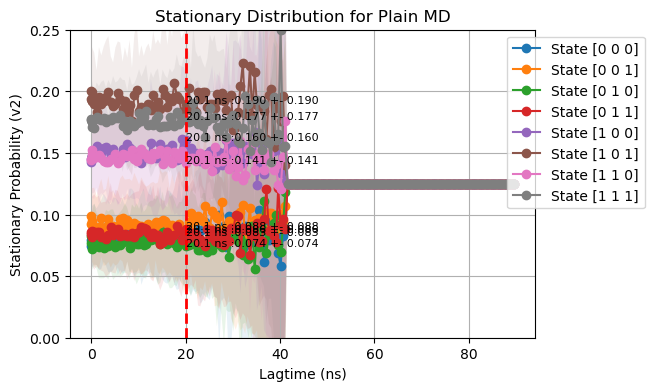

In [36]:
plt.figure(figsize=(6, 4))
state_to_plot = range(8)  # Fix: Select states 0 to 7

# Loop through selected states and plot each separately
for i, state in enumerate(state_to_plot):
    plt.plot(meta_oppc8rep_lagtimes_ns, meta_oppc8rep_pi_all_means[:, i], '-o', label=f'State {plain_md_index_to_state(state)}')
        
    # Add shaded region for standard deviation
    plt.fill_between(meta_oppc8rep_lagtimes_ns, 
                     meta_oppc8rep_pi_all_means[:, i] + meta_oppc8rep_pi_all_stds[:, i],  # Upper bound
                     meta_oppc8rep_pi_all_means[:, i] - meta_oppc8rep_pi_all_stds[:, i],  # Lower bound
                     alpha=0.1)

    # Annotate the first point with its value
    first_x = meta_oppc8rep_lagtimes_ns[44]
    first_y = meta_oppc8rep_pi_all_means[44, i]
    first_y_var = meta_oppc8rep_pi_all_means[44, i]
    plt.text(first_x, first_y,  f"{first_x} ns :{first_y:.3f} +- {first_y_var:.3f}", fontsize=8)
    print(f"{first_x}:{first_y:.3f} +- {first_y_var:.3f}")

plt.axvline(x=first_x, color='r', linestyle='--', linewidth=2)

plt.xlabel('Lagtime (ns)')
plt.ylabel('Stationary Probability (v2)')
plt.title('Stationary Distribution for Plain MD')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.ylim(0, 0.25)
plt.grid(True)
plt.show()


## Combine plot with log scale 

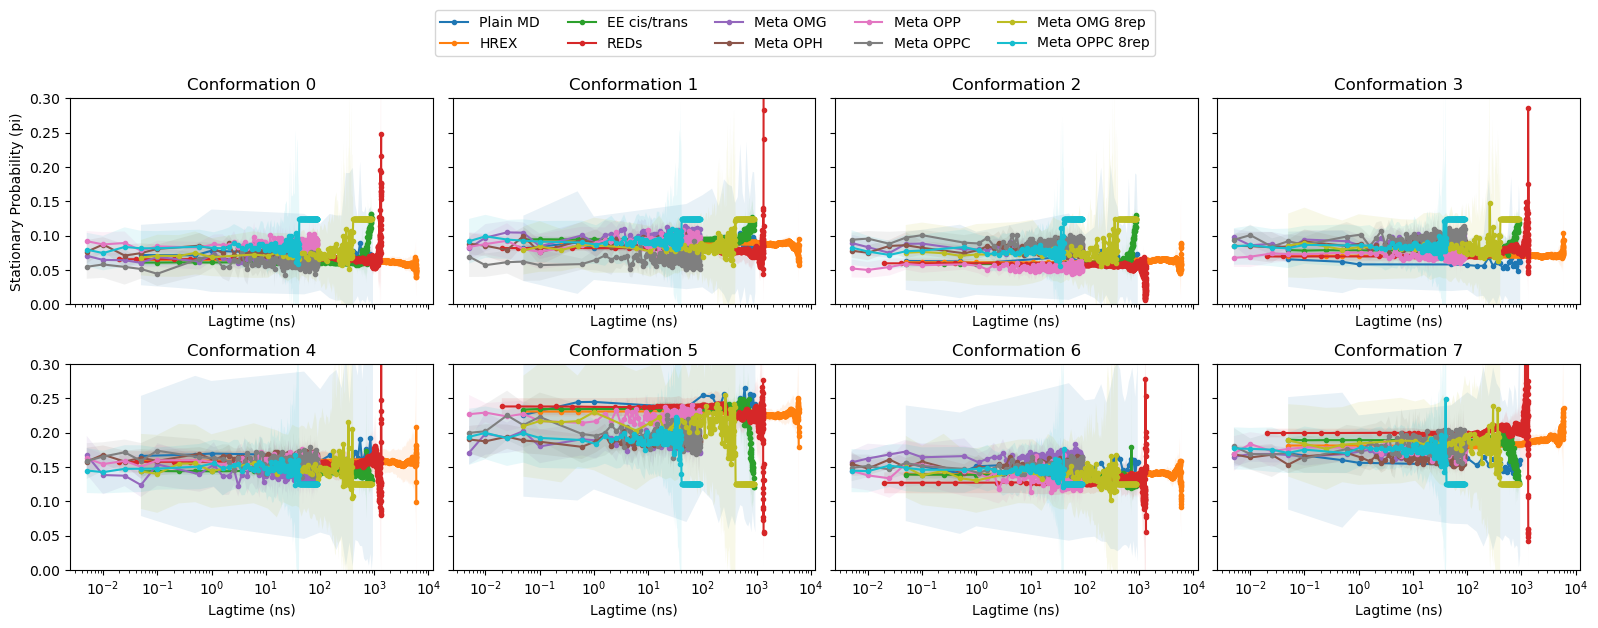

In [37]:
import matplotlib.pyplot as plt

# Put all your methods into one list of dicts
methods_data = [
    {"name": "Plain MD", "lagtimes": plain_md_lagtimes_ns, "means": plain_md_pi_all_means, "stds": plain_md_pi_all_stds},
    {"name": "HREX", "lagtimes": hrex_lagtimes_ns, "means": hrex_pi_all_means_0, "stds": hrex_pi_all_stds_0},
    {"name": "EE cis/trans", "lagtimes": ee_lagtimes_ns, "means": ee_cis_trans_pi_means[0, :, :8], "stds": ee_cis_trans_pi_stds[0, :, :8]},
    {"name": "REDs", "lagtimes": reds_lagtimes_ns, "means": reds_pi_all_means_0, "stds": reds_pi_all_stds_0},
    {"name": "Meta OMG", "lagtimes": meta_omg_lagtimes_ns, "means": meta_omg_pi_all_means, "stds": meta_omg_pi_all_stds},
    {"name": "Meta OPH", "lagtimes": meta_oph_lagtimes_ns, "means": meta_oph_pi_all_means, "stds": meta_oph_pi_all_stds},
    {"name": "Meta OPP", "lagtimes": meta_opp_lagtimes_ns, "means": meta_opp_pi_all_means, "stds": meta_opp_pi_all_stds},
    {"name": "Meta OPPC", "lagtimes": meta_oppc_lagtimes_ns, "means": meta_oppc_pi_all_means, "stds": meta_oppc_pi_all_stds},
    {"name": "Meta OMG 8rep", "lagtimes": meta_omg8rep_lagtimes_ns, "means": meta_omg8rep_pi_all_means, "stds": meta_omg8rep_pi_all_stds},
    {"name": "Meta OPPC 8rep", "lagtimes": meta_oppc8rep_lagtimes_ns, "means": meta_oppc8rep_pi_all_means, "stds": meta_oppc8rep_pi_all_stds},
]

n_states = 8  # one subplot per conformation

epsilon = 1e-6  # minimum value for log scale

fig, axes = plt.subplots(2, 4, figsize=(16, 6), sharex=True, sharey=True)
axes = axes.flatten()

for state in range(n_states):
    ax = axes[state]
    for method in methods_data:
        means = np.clip(method["means"][:, state], epsilon, None)
        stds = method["stds"][:, state]
        upper = np.clip(means + stds, epsilon, None)
        lower = np.clip(means - stds, epsilon, None)

        ax.plot(method["lagtimes"], means, '-o', label=method["name"], markersize=3)
        ax.fill_between(method["lagtimes"], upper, lower, alpha=0.1)

    ax.set_title(f"Conformation {state}")
    ax.set_ylim(0, 0.3)
    ax.set_xscale("log")  # log scale now works
    if state == 0:
        ax.set_ylabel("Stationary Probability (pi)")
    ax.set_xlabel("Lagtime (ns)")

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig(f"fig/stationary_population_all_8_conform_log_scale.pdf", )
plt.show()

## Combine Plot 

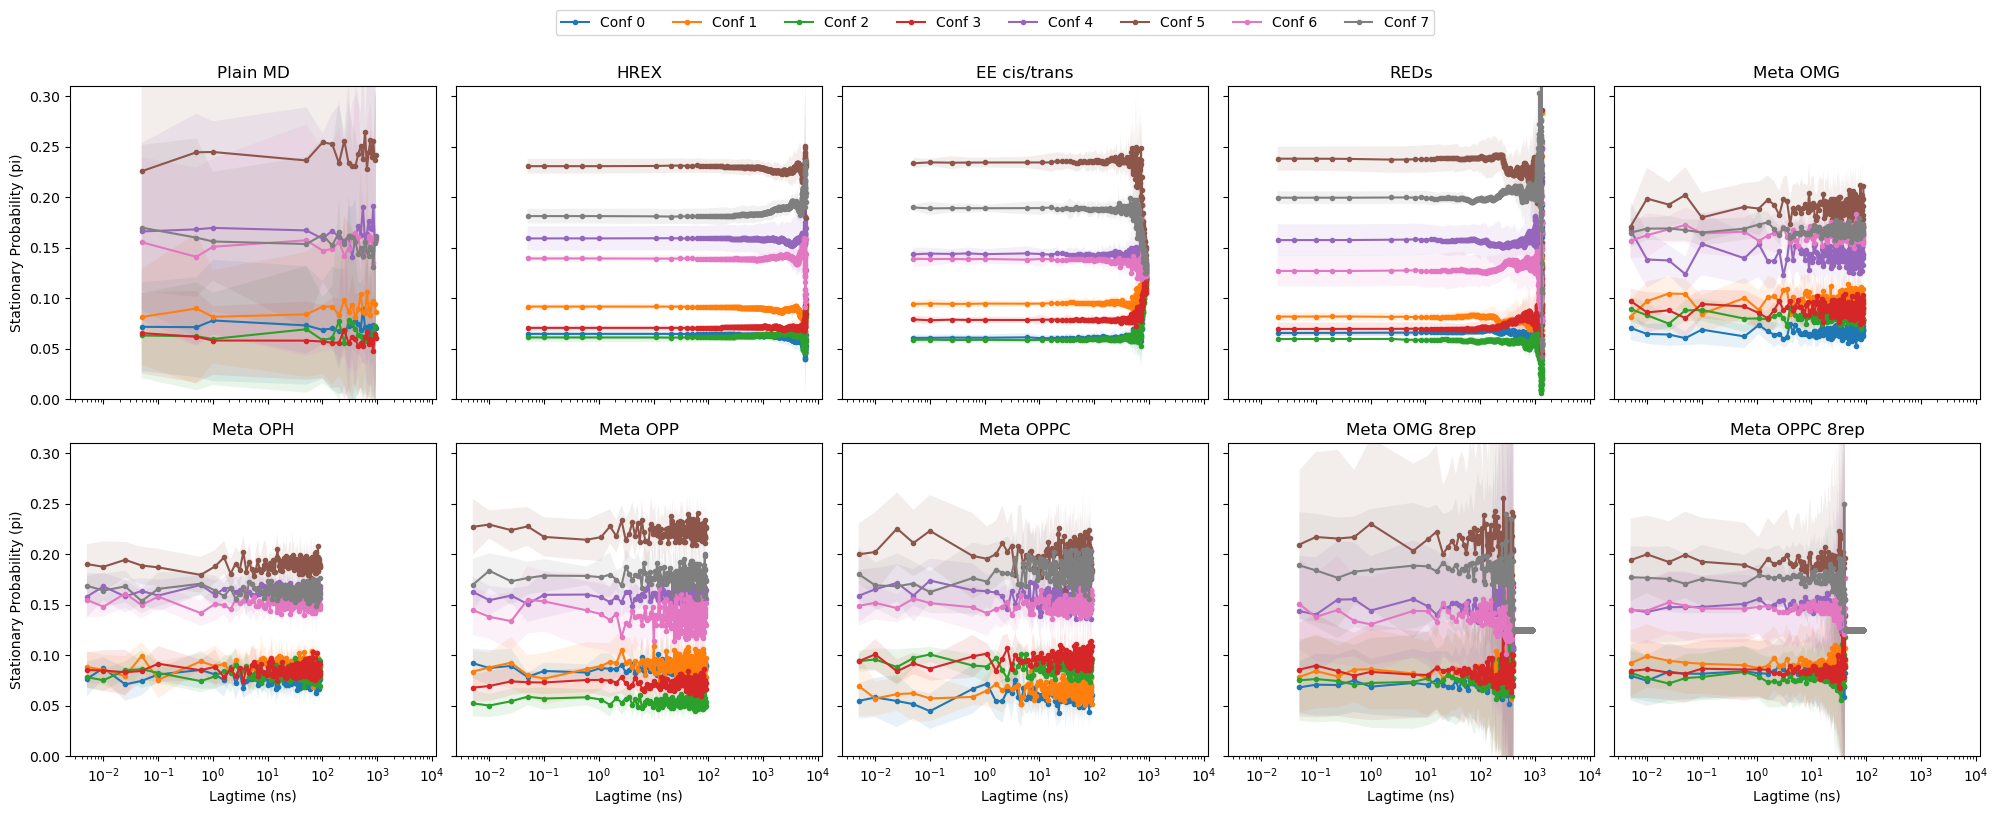

In [38]:
import numpy as np
import matplotlib.pyplot as plt

epsilon = 1e-6  # for log scale clipping

fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)
axes = axes.flatten()

for idx, method in enumerate(methods_data):
    ax = axes[idx]
    lagtimes = method["lagtimes"]

    for state in range(n_states):
        means = np.clip(method["means"][:, state], epsilon, None)
        stds = method["stds"][:, state]
        upper = np.clip(means + stds, epsilon, None)
        lower = np.clip(means - stds, epsilon, None)

        ax.plot(lagtimes, means, '-o', label=f"Conf {state}", markersize=3)
        ax.fill_between(lagtimes, upper, lower, alpha=0.1)

    ax.set_title(method["name"])
    ax.set_xscale("log")
    ax.set_ylim(0, 0.31)
    #ax.grid(True, which="both", ls="--", lw=0.5)
    if idx % 5 == 0:  # first column
        ax.set_ylabel("Stationary Probability (pi)")
    if idx >= 5:  # bottom row
        ax.set_xlabel("Lagtime (ns)")

# Legend once for all
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=8)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig(f"fig/stationary_population_all_8_conform.pdf", )
plt.show()
